In [56]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import matplotlib.figure as fig

In [57]:
%matplotlib inline

In [58]:
class Car:

    def __init__(self, location=0, length=5, desired_speed=3.33,\
                speed=0):

                self.location = location
                self.length = length
                self.desired_speed = desired_speed
                self.speed = speed


    def distance(self, next_car):

        if (next_car.location -5) <= 100 and self.location > 750:
            return ((next_car.location) + 1000) - self.location
        else:
            return (next_car.location -5) - self.location

    def update_speed(self, next_car):
        if np.random.randint(1,11) == 1:
            if self.speed == 0 or self.speed <= 2:
                self.speed = 0
            else:
              self.speed = self.speed - 2
        else:
            if self.desired_speed < self.distance(next_car):
                if self.speed <= self.desired_speed - 2:
                    self.speed = self.speed + 2
                else:
                    self.speed = self.desired_speed
            elif self.speed > self.distance(next_car):
                self.speed = self.distance(next_car)



    def next_position(self):
        return (self.location + self.speed) % 1000

    def move(self):
        self.location = self.next_position()

In [59]:
class Simulation:

    def __init__(self, cars):
        self.cars = cars


    def run(self):

        new_speed = []
        new_loc = []
        sim = {0: list(zip(([0]*len(self.cars)),list_starting_pos)),  }
        tick = 0

        while (tick < 60):
            for idx in range(len(self.cars)):
                self.cars[idx].update_speed(self.cars[((idx + 1)%len(self.cars))])
                self.cars[idx].next_position()
                self.cars[idx].move()
                new_speed.append(self.cars[idx].speed)
                new_loc.append(self.cars[idx].location)
#             sim[tick +1] = list(zip(new_speed, new_loc))
#             new_speed = []
#             new_loc = []
            tick += 1

        return new_loc

In [60]:
cars = [Car() for _ in range(30)]

starting_pos = np.linspace(0, 995, len(cars))
list_starting_pos = np.array(starting_pos).tolist()

for car, pos in zip(cars, starting_pos):
    car.location = pos

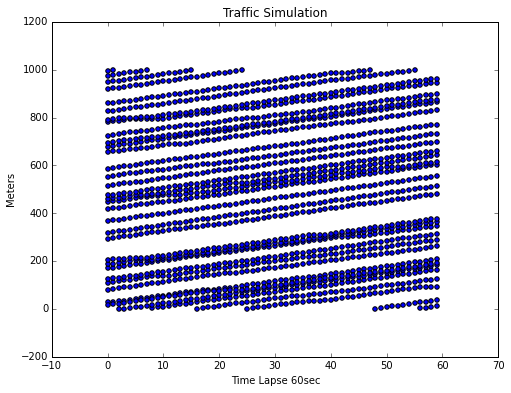

In [73]:
# x = [key for key in Simulation(cars).run().keys()]
# y = [val[1] for val in Simulation(cars).run().values()]

x = np.array([[x]*30 for x in range(60)]).flatten()

y = Simulation(cars).run()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x,y)
# plt.xticks(range(5), x)
plt.xlabel("Time Lapse 60sec")
plt.ylabel("Meters")
plt.title("Traffic Simulation")
plt.show()
